In [1]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [2]:
# Loading raw english data
english_df = []
with open("C:/Users/PcPack/Downloads/aaaa/europarl-v7.bg-en.en", encoding="utf-8") as file:
    for line in file:
        english_df.append(line.strip())

english_df = pd.DataFrame(english_df, columns=["English"])
english_df.head()

,English
0,Membership of Parliament: see Minutes
1,Approval of Minutes of previous sitting: see M...
2,Membership of Parliament: see Minutes
3,Verification of credentials: see Minutes
4,Documents received: see Minutes


In [3]:
# Loading raw Czech data
czech_df = []
with open("europarl-v7.cs-en.cs", encoding="utf-8") as file:
    for line in file:
        czech_df.append(line.strip())

czech_df = pd.DataFrame(czech_df, columns=["Czech"])
czech_df.head()

,Czech
0,Následný postup na základě usnesení Parlamentu...
1,Předložení dokumentů: viz zápis
2,Písemná prohlášení (článek 116 jednacího řádu)...
3,Texty smluv dodané Radou: viz zápis
4,Složení Parlamentu: viz zápis


In [4]:
# Loading raw Czech data
polish_df = []
with open("europarl-v7.pl-en.pl", encoding="utf-8") as file:
    for line in file:
        polish_df.append(line.strip())

polish_df = pd.DataFrame(polish_df, columns=["Polish"])
polish_df.head()

,Polish
0,Działania podjęte w wyniku rezolucji Parlament...
1,Składanie dokumentów: patrz protokół
2,Oświadczenia pisemne (art. 116 Regulaminu): pa...
3,Teksty porozumień przekazane przez Radę: patrz...
4,Skład Parlamentu: patrz protokół


In [5]:
print(english_df.shape)
print(czech_df.shape)
print(polish_df.shape)

(406934, 1)
(646605, 1)
(632565, 1)


In [9]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [10]:
# Cleaning the data for english dataset

data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [11]:
# Cleaning the data for Czech dataset

data_czech = []
lang_czech = []

for i, line in czech_df.iterrows():
    line = line['Czech']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_czech.append(line)
        lang_czech.append("Czech")

In [14]:
# Cleaning the data for Czech dataset

data_pol = []
lang_pol = []

for i, line in polish_df.iterrows():
    line = line['Polish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_pol.append(line)
        lang_pol.append("Polish")

In [19]:
df = pd.DataFrame({
    "Text" : data_eng+data_pol+data_czech,
    "Language" : lang_eng+lang_pol+lang_czech,
})

print(df.shape)

(1685821, 2)


In [20]:
df.head()

,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [22]:
df['Language'].value_counts()

Language
Czech      646526
Polish     632416
English    406879
Name: count, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

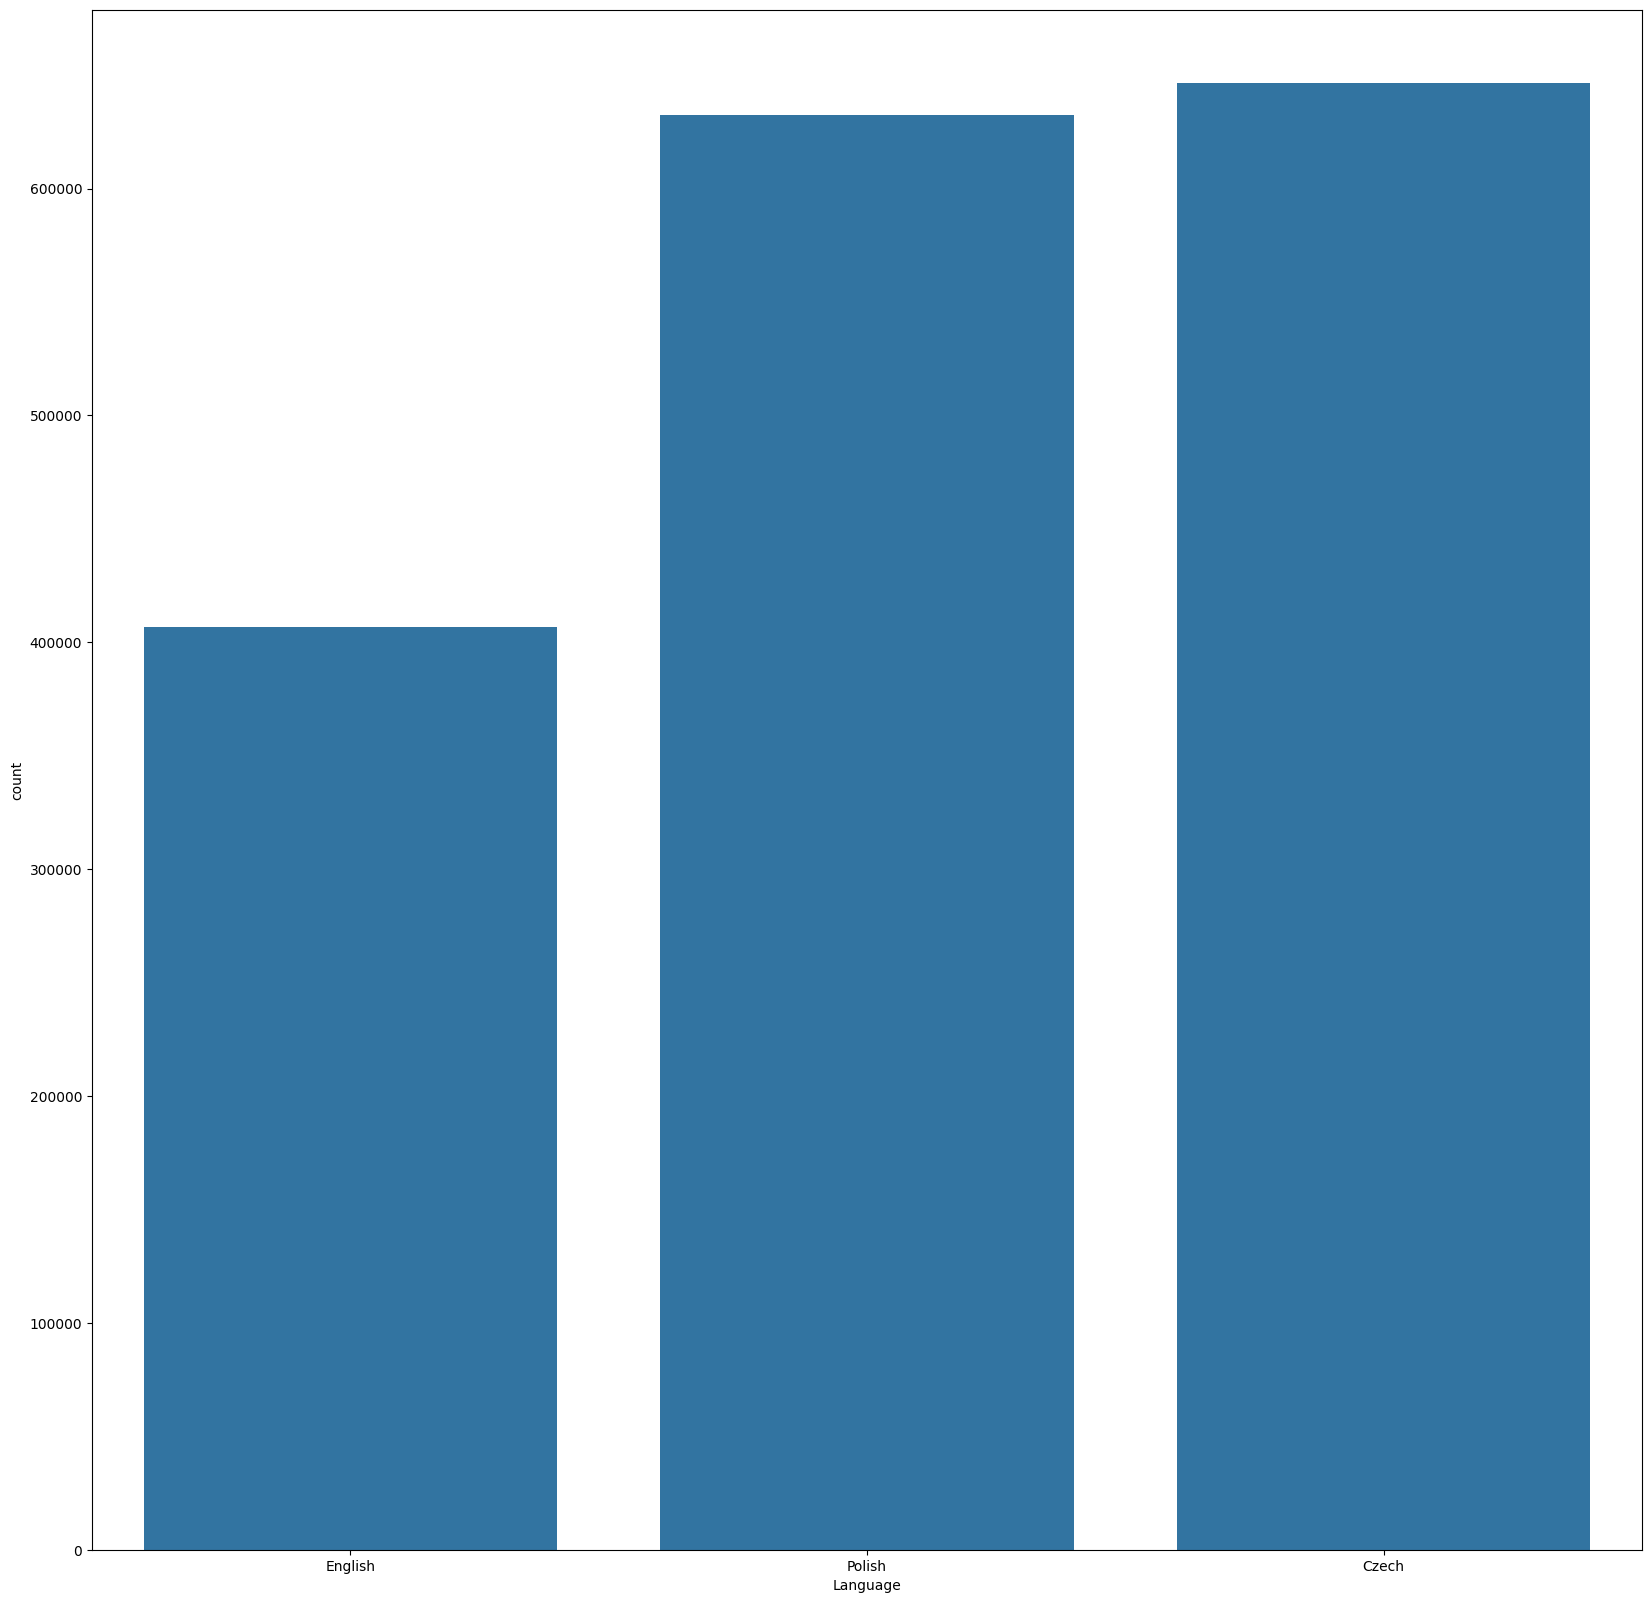

In [23]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

In [24]:
x = df.iloc[:,0] 
y = df.iloc[:,1]

In [25]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [26]:
x.head()

0                 membership of parliament see minutes
1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [29]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [32]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [ ]:
pipe_mnb.fit(x_train, y_train)

In [34]:
lr_predicted = pipe_lr.predict(x_test)

In [35]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 99.5723162249937 % accuracy


In [36]:
mnb_predicted = pipe_mnb.predict(x_test)

In [37]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 99.52397194252073 % accuracy


In [38]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[128766     81    629]
 [    40  80379    547]
 [    69     76 126578]]


In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


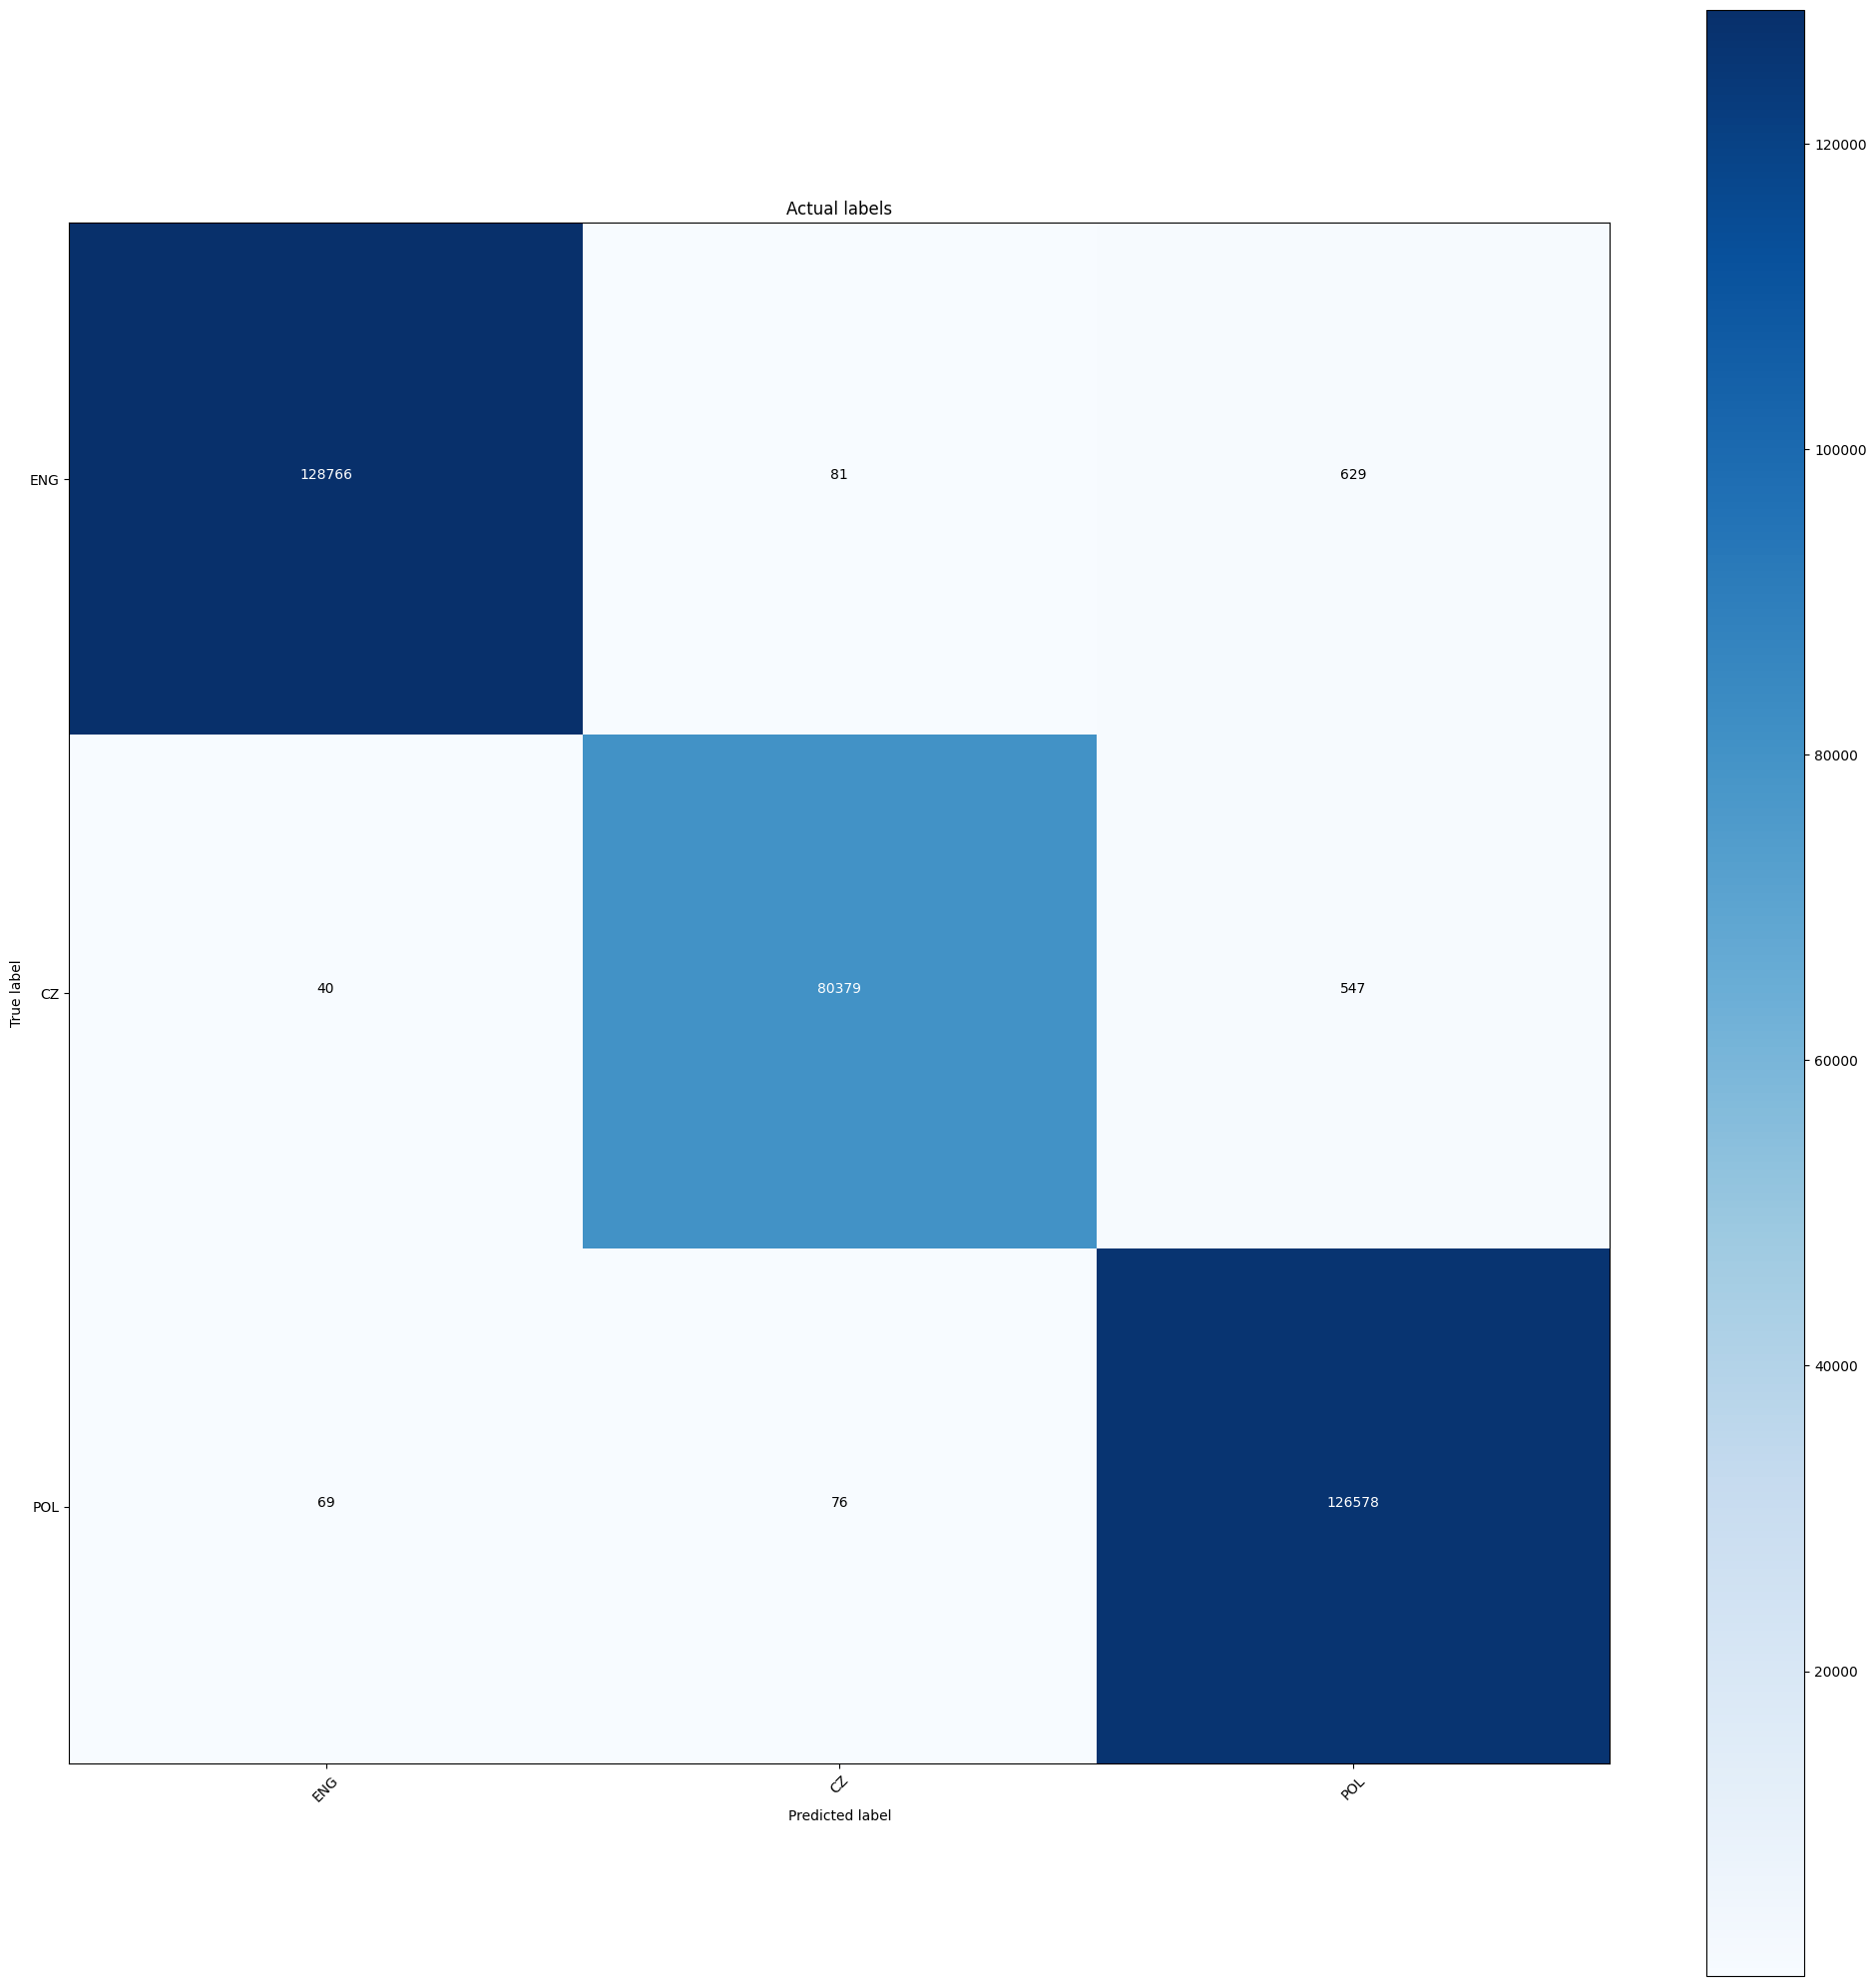

In [41]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(matrix, classes = ['ENG','CZ','POL'])

In [42]:
import pickle

In [43]:
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()